# Variational Autoencoder analysis. MILES stellar library

Data download: http://svocats.cab.inta-csic.es/miles/index.php?action=credits
#### ACKNOWLEDGMENT
This work is based on data from the MILES service developed by the Spanish Virtual Observatory in the framework of the IAU Comission G5 Working Group : Spectral Stellar Libraries.

In [1]:
from astropy.io import fits
import matplotlib.pylab as plt
import numpy as np

import os
from pathlib import Path

In [2]:
import tensorflow as tf
from tensorflow.keras import layers

In [3]:
root = '## YOUR FOLDER PATH TO THE DOWNLOADED SPECTRA ##'

## Checking the data

In [4]:
file = "/Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0597.fits"

sp = fits.open(file)
print('\n\nHeader of the spectrum :\n\n', sp[0].header, '\n\n')

flux2 = np.zeros(sp[0].header['NAXIS1'], dtype=float)

flux2 = np.array(sp[0].data)
flux_norm = flux2/(np.nanmax(flux2))

wave2 = np.ones(sp[0].header['NAXIS1'], dtype=float)
for i in range(sp[0].header['NAXIS1']):
    wave2[i] = sp[0].header['CRVAL1'] + i*sp[0].header['CDELT1']
    
flux_ok = np.reshape(flux_norm, (sp[0].header['NAXIS1']))



Header of the spectrum :

 SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                 4367 / length of data axis 1                          NAXIS2  =                    1 / length of data axis 2                          COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H COMMENT ----------------------------------------------------------------------  COMMENT ************************** REDUCEME HEADER ***************************  COMMENT ----------------------------------------------------------------------  HISTORY Date: 06/10/**                                                          CRPIX1  =                 1.00                                                  CRVAL1  =  

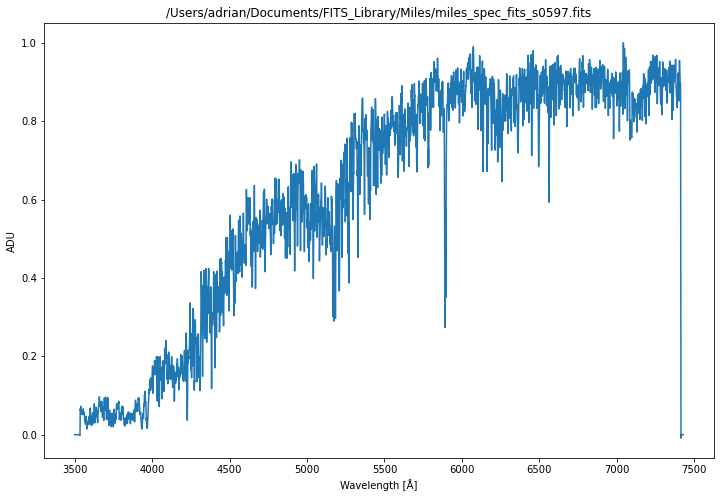

In [5]:
fig = plt.figure(1, figsize=(12, 8))
plt.plot(wave2, flux_ok)
plt.xlabel('Wavelength [Å]')
plt.ylabel('ADU')
plt.title(file)
plt.show()

## Generating a custom set with the complete library

In [6]:
num = 1
dim1 = sp[0].header['NAXIS1']
#dim2=1

for path, subdirs, files in os.walk(root):
    for nanme in files:
        num += 1
print(num)
print(dim1)

985
4367


In [7]:
curves = 0
custom_set = np.zeros((num, dim1))
label_set = np.zeros((num, ), dtype=int)
spectra_set = [''] * num 

for path, subdirs, files in os.walk(root):
    for name in files:
        file = [os.path.join(path, name)]
        str = " " 
        Ffile = (str.join(file))
        route = Path(name)
        Fname = route.with_suffix('')
        Fpng = route.with_suffix('.png')

        data, header = fits.getdata(Ffile, header=True)
        hdu_number = 0
        fits.getheader(Ffile, hdu_number)
        fits_file = Ffile
        
        with fits.open(fits_file, mode='readonly') as hdulist:
            hdulist.info()
            data = np.array(hdulist[0].data)
             
            data_norm = np.reshape(data/(np.nanmax(data)), (sp[0].header['NAXIS1']))

            
            label_set[curves] = curves 
            spectra_set[curves] = name
            for i in range (dim1):
                custom_set[curves,i] = (data_norm[i])
        hdulist.close   
        curves += 1
               
        print ("Spectra loaded:",curves+1, "spectra");


Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0597.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 2 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0981.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 3 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0578.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 4 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0082.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 5 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits

Spectra loaded: 37 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0903.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 38 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0450.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 39 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0779.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 40 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0283.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 41 spectra
Filename: /Users/adrian/Documents/FIT

Spectra loaded: 73 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0431.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 74 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0124.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 75 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0574.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 76 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0827.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 77 spectra
Filename: /Users/adrian/Documents/FIT

Spectra loaded: 108 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0688.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 109 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0667.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 110 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0237.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 111 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0958.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 112 spectra
Filename: /Users/adrian/Document

Spectra loaded: 143 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0148.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 144 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0324.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 145 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0774.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 146 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0261.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 147 spectra
Filename: /Users/adrian/Document

Spectra loaded: 178 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0349.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 179 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0294.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 180 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0781.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 181 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0851.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 182 spectra
Filename: /Users/adrian/Document

Spectra loaded: 213 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 214 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0451.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 215 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0646.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 216 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0216.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 217 spectra
Filename: /Users/adrian/Document

Spectra loaded: 248 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0067.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 249 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0437.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 250 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0964.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 251 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0821.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 252 spectra
Filename: /Users/adrian/Document

Spectra loaded: 283 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0636.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 284 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0909.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 285 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0724.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 286 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0374.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 287 spectra
Filename: /Users/adrian/Document

Spectra loaded: 318 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0315.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 319 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0883.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 320 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0929.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 321 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0180.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 322 spectra
Filename: /Users/adrian/Document

Spectra loaded: 353 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0801.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 354 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0102.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 355 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0552.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 356 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0047.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 357 spectra
Filename: /Users/adrian/Document

Spectra loaded: 423 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0601.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 424 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0251.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 425 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0744.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 426 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0314.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 427 spectra
Filename: /Users/adrian/Document

Spectra loaded: 458 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0322.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 459 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0772.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 460 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0288.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 461 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0267.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 462 spectra
Filename: /Users/adrian/Document

Spectra loaded: 493 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0089.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 494 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0858.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 495 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0622.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 496 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0272.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 497 spectra
Filename: /Users/adrian/Document

Spectra loaded: 528 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0927.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 529 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0024.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 530 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0474.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 531 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0618.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 532 spectra
Filename: /Users/adrian/Document

Spectra loaded: 563 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0100.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 564 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0550.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 565 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0803.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 566 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0395.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 567 spectra
Filename: /Users/adrian/Document

Spectra loaded: 598 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0881.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 599 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0747.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 600 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0317.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 601 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0602.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 602 spectra
Filename: /Users/adrian/Document

Spectra loaded: 633 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0496.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 634 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0479.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 635 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0183.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 636 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0029.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 637 spectra
Filename: /Users/adrian/Document

Spectra loaded: 668 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0044.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 669 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0414.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 670 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0101.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 671 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0551.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 672 spectra
Filename: /Users/adrian/Document

Spectra loaded: 703 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0530.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 704 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0863.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 705 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0926.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 706 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0025.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 707 spectra
Filename: /Users/adrian/Document

Spectra loaded: 738 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0859.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 739 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0278.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 740 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0782.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 741 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0628.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 742 spectra
Filename: /Users/adrian/Document

Spectra loaded: 773 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0147.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 774 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0517.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 775 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0700.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 776 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0350.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 777 spectra
Filename: /Users/adrian/Document

Spectra loaded: 808 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0018.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 809 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0448.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 810 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0624.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 811 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0274.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 812 spectra
Filename: /Users/adrian/Document

Spectra loaded: 843 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0022.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 844 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0472.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 845 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0188.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 846 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0921.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 847 spectra
Filename: /Users/adrian/Document

Spectra loaded: 878 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0166.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 879 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0536.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 880 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0023.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 881 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0473.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 882 spectra
Filename: /Users/adrian/Document

Spectra loaded: 913 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0330.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 914 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0019.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 915 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0449.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 916 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0081.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 917 spectra
Filename: /Users/adrian/Document

Spectra loaded: 948 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0214.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 949 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 950 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0453.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 951 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0900.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 952 spectra
Filename: /Users/adrian/Document

Spectra loaded: 983 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0629.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 984 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0296.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 985 spectra


## Splitting the dataset

In [8]:
label_set = np.asarray(label_set)

In [9]:
dataset = tf.data.Dataset.from_tensor_slices((custom_set, label_set))
dataset.element_spec

(TensorSpec(shape=(4367,), dtype=tf.float64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(custom_set,label_set,test_size=0.2,random_state=123)

## VAE Definition

In [12]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim), mean=0., stddev=0.1)
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [13]:
original_dim = dim1
latent_dim = 12
intermediate_dim = dim1/latent_dim

In [14]:
original_inputs = tf.keras.Input(shape=(original_dim,), name="encoder_input")
x = layers.Dense(intermediate_dim, activation="relu")(original_inputs)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()((z_mean, z_log_var))
encoder = tf.keras.Model(inputs=original_inputs, outputs=z, name="encoder")

In [15]:
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 4367)]       0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 363)          1585584     encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 12)           4368        dense[0][0]                      
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 12)           4368        dense[0][0]                      
____________________________________________________________________________________________

In [16]:
latent_inputs = tf.keras.Input(shape=(latent_dim,), name="z_sampling")
x = layers.Dense(intermediate_dim, activation="relu")(latent_inputs)
outputs = layers.Dense(original_dim, activation="sigmoid")(x)
decoder = tf.keras.Model(inputs=latent_inputs, outputs=outputs, name="decoder")

In [17]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      [(None, 12)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 363)               4719      
_________________________________________________________________
dense_2 (Dense)              (None, 4367)              1589588   
Total params: 1,594,307
Trainable params: 1,594,307
Non-trainable params: 0
_________________________________________________________________


In [18]:
outputs = decoder(z)
vae = tf.keras.Model(inputs=original_inputs, outputs=outputs, name="vae")

In [19]:
vae.summary()

Model: "vae"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 4367)]       0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 363)          1585584     encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 12)           4368        dense[0][0]                      
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 12)           4368        dense[0][0]                      
________________________________________________________________________________________________

In [20]:
kl_loss = -0.5 * tf.reduce_mean(z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)
vae.add_loss(kl_loss)

In [21]:
vae.summary()

Model: "vae"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 4367)]       0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 363)          1585584     encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 12)           4368        dense[0][0]                      
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 12)           4368        dense[0][0]                      
________________________________________________________________________________________________

## Training

In [22]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
vae.compile(optimizer, loss=tf.keras.losses.MeanSquaredError())
vae.fit(x_train, x_train, epochs=100, batch_size=2)

Epoch 1/100
394/394 [==============================] - 4s 8ms/step - loss: 0.2439
Epoch 2/100
394/394 [==============================] - 3s 8ms/step - loss: 0.0621
Epoch 3/100
394/394 [==============================] - 3s 8ms/step - loss: 0.0438
Epoch 4/100
394/394 [==============================] - 3s 7ms/step - loss: 0.0257
Epoch 5/100
394/394 [==============================] - 3s 7ms/step - loss: 0.0233
Epoch 6/100
394/394 [==============================] - 3s 8ms/step - loss: 0.0362
Epoch 7/100
394/394 [==============================] - 3s 8ms/step - loss: 0.0354
Epoch 8/100
394/394 [==============================] - 3s 8ms/step - loss: 0.0267
Epoch 9/100
394/394 [==============================] - 3s 8ms/step - loss: 0.0279
Epoch 10/100
394/394 [==============================] - 3s 8ms/step - loss: 0.0253
Epoch 11/100
394/394 [==============================] - 3s 8ms/step - loss: 0.0247
Epoch 12/100
394/394 [==============================] - 3s 8ms/step - loss: 0.0261
Epoch 13/100


## Testing over the complete library

In [23]:
encoded = encoder(custom_set)

In [24]:
tf.shape(encoded)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([985,  12], dtype=int32)>

In [25]:
encoded_imgs=encoded.numpy()

In [26]:
decoded = vae(custom_set)

In [27]:
tf.shape(decoded)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 985, 4367], dtype=int32)>

In [28]:
decoded_imgs=decoded.numpy()

Text(0.5, 0, 'Decoded Spectra')

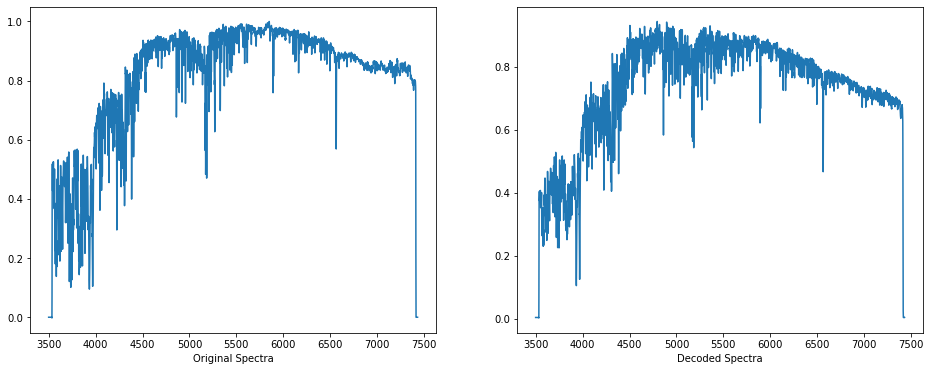

In [29]:
figure = 43
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(wave2, custom_set[figure])
ax[0].set_xlabel('Original Spectra')   
ax[1].plot(wave2, decoded_imgs[figure])
ax[1].set_xlabel('Decoded Spectra')

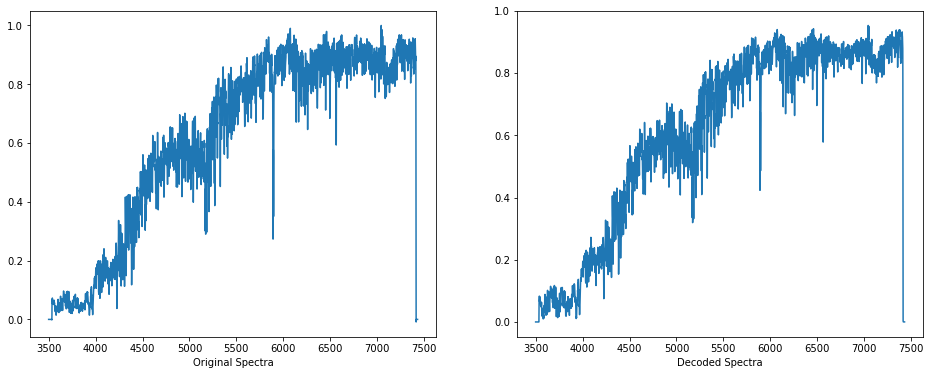

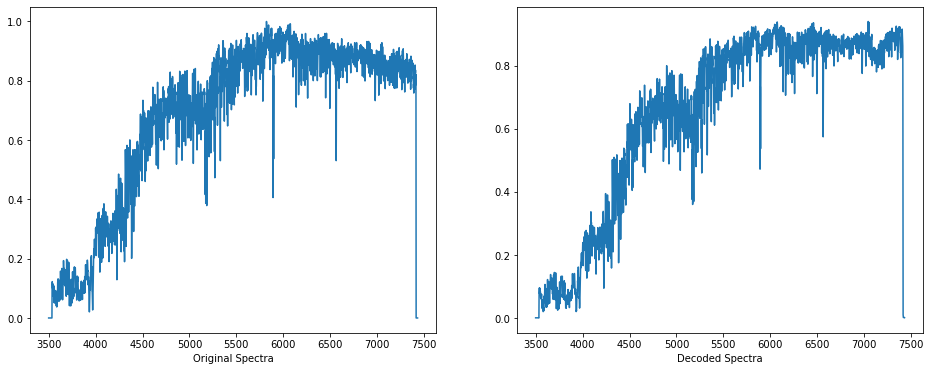

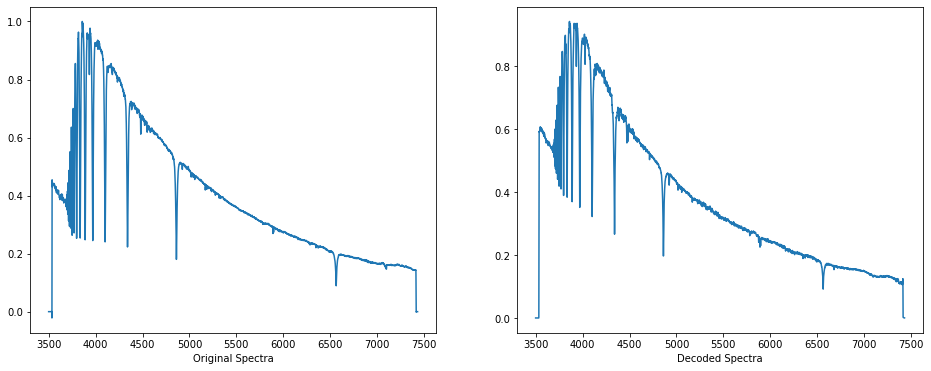

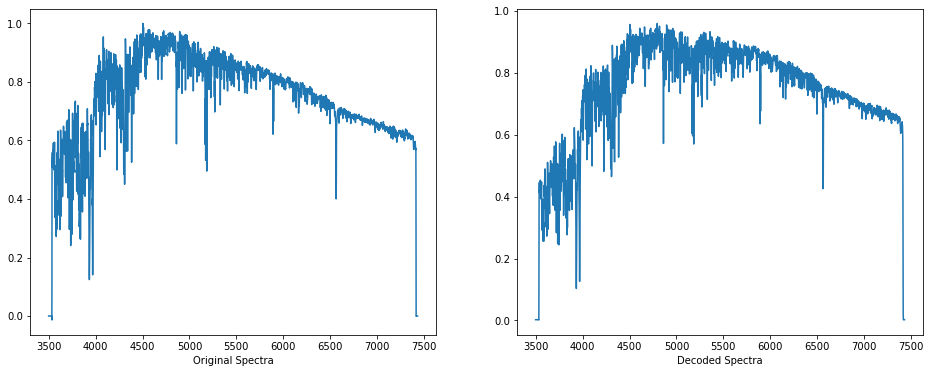

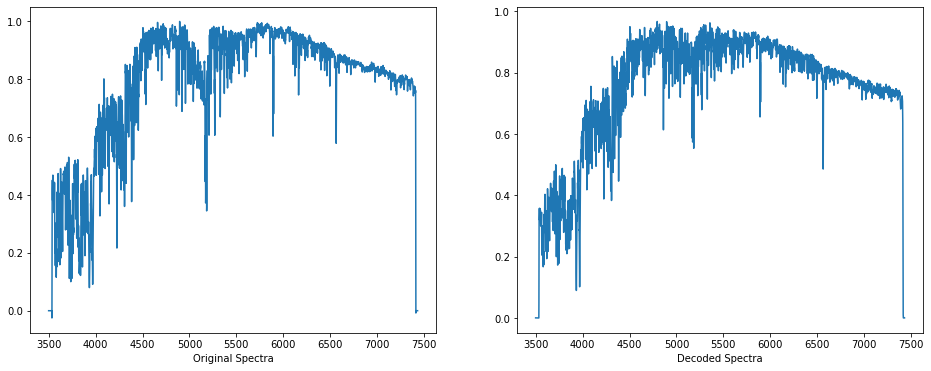

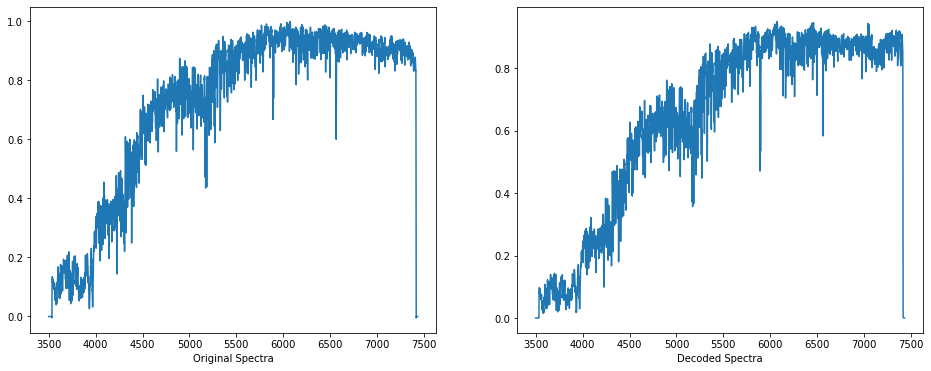

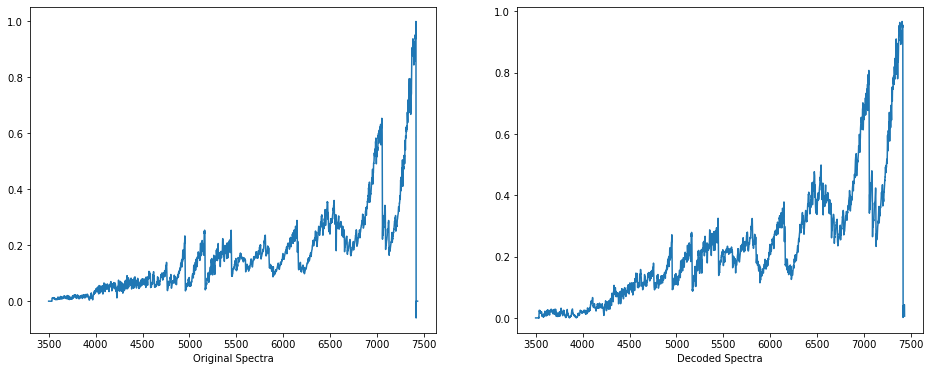

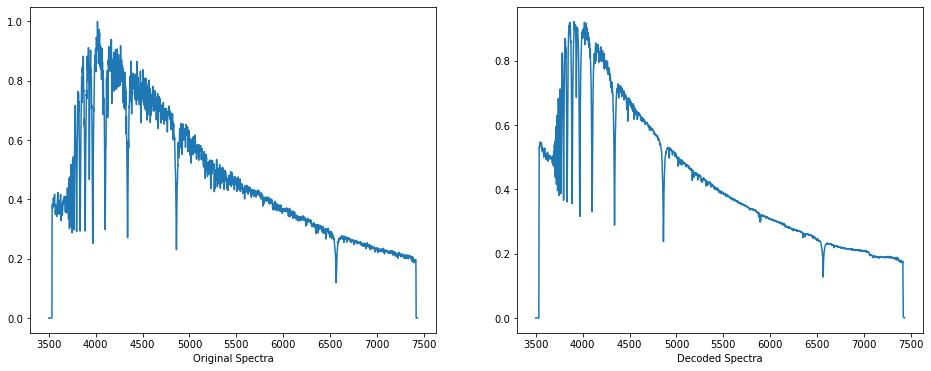

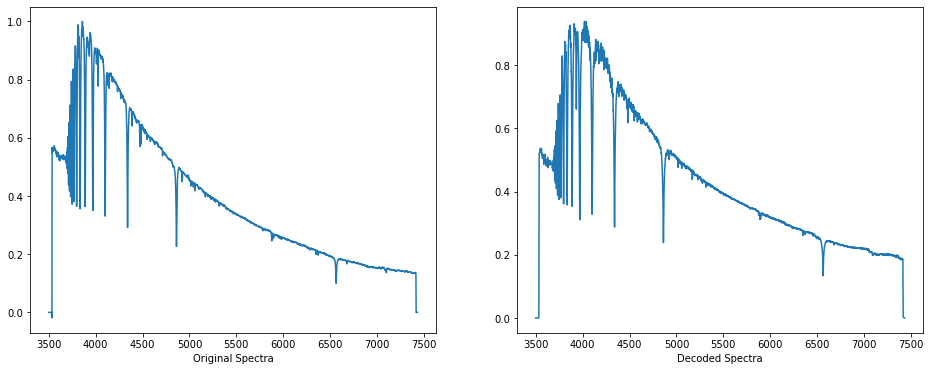

In [30]:
for m in range(10):
    figure = m
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].plot(wave2, custom_set[figure])
    ax[0].set_xlabel('Original Spectra')   
    ax[1].plot(wave2, decoded_imgs[figure])
    ax[1].set_xlabel('Decoded Spectra')
plt.close(fig)

## Plotting the distribution

In [31]:
x = []
y = []
for i in range(num):
    op = vae.predict(np.array([custom_set[i]]))
    x.append(op[0][0])
    y.append(op[0][1])

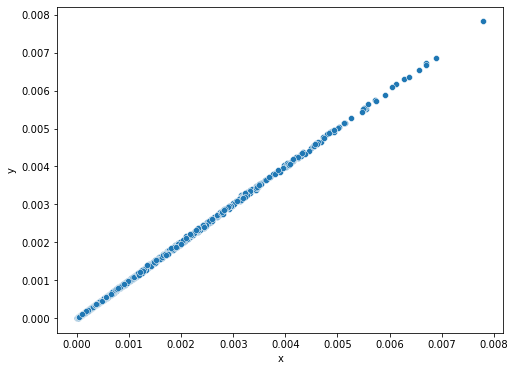

In [32]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame()
df['x'] = x
df['y'] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=df)
plt.show()

## Saving results and model

In [33]:
np.save('VAE_encoded_imgs.npy', encoded_imgs)

In [34]:
np.save('VAE_decoded_imgs.npy', decoded_imgs)

In [35]:
vae.save('Miles_VAE.tf',save_format='tf')

INFO:tensorflow:Assets written to: Miles_VAE.tf/assets


In [36]:
encoder.save('Miles_VAE_Encoder.tf', save_format='tf')

INFO:tensorflow:Assets written to: Miles_VAE_Encoder.tf/assets


In [37]:
encoder.save('Miles_VAE_Decoder.tf', save_format='tf')

INFO:tensorflow:Assets written to: Miles_VAE_Decoder.tf/assets


In [38]:
from numpy import save
weights = vae.get_weights()
vae.save_weights('Miles_VAE_Weights', weights)

In [1]:
import session_info
session_info.show()